In [11]:
import pickle
import pandas as pd
import sklearn.tree as tree
import sklearn.ensemble as ensemble
from sklearn.datasets import make_moons
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

Ref:
https://scikit-learn.org/stable/supervised_learning.html

use more Ensemble learning algos

# Get all SAL files and create 1 df

In [ ]:
import os
from pprint import pprint

all_files = [f for f in os.walk('/lustre/scratch/tv349/AMR/BinaryPTrainingData/')]

SAL_4k_paths = []
for path, folders, files in all_files:
    if "SAL" in path and "k4" in path:
        SAL_4k_paths.append(path)

for path in SAL_4k_paths:
    sal_name = path.rsplit("/", 2)[1]

    f0 = f"{path}/TRAININGDATA.{sal_name}.xlsx K4-Part0.p"
    f1 = f"{path}/TRAININGDATA.{sal_name}.xlsx K4-Part1.p"
    f2 = f"{path}/TRAININGDATA.{sal_name}.xlsx K4-Part2.p"

    df0 = pd.read_pickle(f0)
    df1 = pd.read_pickle(f1)
    df2 = pd.read_pickle(f2)
    

# df = df0 + df1 + df2
df = df0.append(df1, ignore_index=True)
df = df.append(df2, ignore_index=True)

In [3]:
# for 4 mers
X = df.drop(columns=["Antibiotic", "MIC"], axis=1) # pick every but (Antibiotic, MIC)
y = df.iloc[:,1] # pick 2nd column (MIC values)

In [8]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test_up = pd.DataFrame([str(float(x) + 1) for x in y_test]).iloc[:, 0]
y_test_down = pd.DataFrame([str(float(x) - 1) for x in y_test]).iloc[:, 0]

# Confusion matrix for 2 dilutions

In [39]:
def create_confusion_matrix(y_test, y_pred):
    # Get the difference between pred and test data
    y_test = y_test.to_numpy()
    diff = y_pred.astype(float) - y_test.astype(float)

    # only keep +- 1 dilutions
    diff[diff > 1]=0
    diff[diff < -1]=0

    # force pred values to match +- 1 actual values 
    y_pred2 = y_pred.astype(float) - diff

    # Confusion matrix
    labels = [float(val) for val in sorted(set(y_test) | set(y_pred))]
    return sklearn.metrics.confusion_matrix(y_test.astype(float), y_pred2, labels=labels), labels

# Naive Bayes

In [10]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Prediction
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {score}")

# 2 dilutions Prediction
score += accuracy_score(y_test_up, y_pred)
score += accuracy_score(y_test_down, y_pred)
print(f"Accuracy (2 dilutions): {score}")

print(create_confusion_matrix(y_test, y_pred))

Accuracy: 0.38257575757575757
Accuracy (2 dilutions): 0.4573863636363636


Text(0.5, 1.0, 'Confusion Matrix (%)')

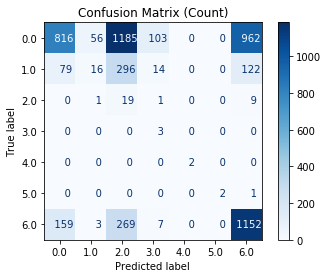

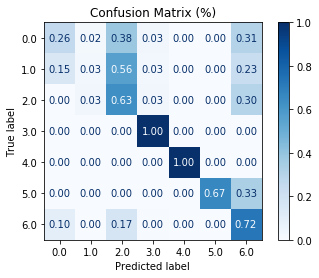

In [11]:
# Confusion matrix
disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize=None,
                            labels="0.0 1.0 2.0 3.0 4.0 5.0 6.0".split(),
                            values_format='6')
disp.ax_.set_title("Confusion Matrix (Count)")
# disp.confusion_matrix

disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize="true",
                            labels="0.0 1.0 2.0 3.0 4.0 5.0 6.0".split(),
                            values_format='.2f')
disp.ax_.set_title("Confusion Matrix (%)")

# KNN

In [40]:
clf = KNeighborsClassifier(n_neighbors=20, weights='uniform', algorithm='auto', leaf_size=30, p=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Prediction
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {score}")

# 2 dilutions Prediction
score += accuracy_score(y_test_up, y_pred)
score += accuracy_score(y_test_down, y_pred)
print(f"Accuracy (2 dilutions): {score}")

Accuracy: 0.7367424242424242
Accuracy (2 dilutions): 0.8257575757575757


Text(0.5, 1.0, 'Confusion Matrix (%)')

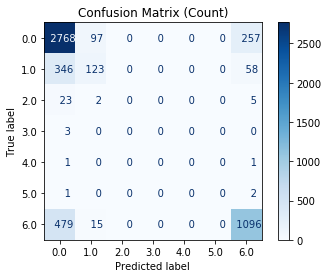

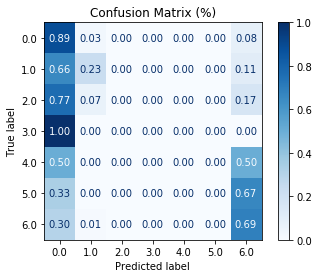

In [41]:
# Confusion matrix
disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize=None,
                            labels="0.0 1.0 2.0 3.0 4.0 5.0 6.0".split(),
                            values_format='6')
disp.ax_.set_title("Confusion Matrix (Count)")
# disp.confusion_matrix

disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize="true",
                            labels="0.0 1.0 2.0 3.0 4.0 5.0 6.0".split(),
                            values_format='.2f')
disp.ax_.set_title("Confusion Matrix (%)")

# K means.
Noted that this is unsupervised and we need to provide number of classes which can be found from `len(set(MIC column))`

# SVM

In [12]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Prediction
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {score}")

# 2 dilutions Prediction
score += accuracy_score(y_test_up, y_pred)
score += accuracy_score(y_test_down, y_pred)
print(f"Accuracy (2 dilutions): {score}")

Accuracy: 0.6070075757575758
Accuracy (2 dilutions): 0.6931818181818182


Text(0.5, 1.0, 'Confusion Matrix (%)')

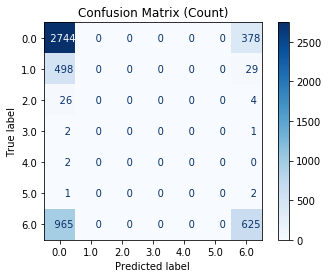

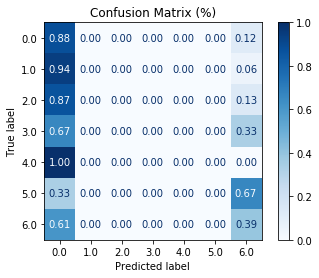

In [13]:
# Confusion matrix
disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize=None,
                            labels="0.0 1.0 2.0 3.0 4.0 5.0 6.0".split(),
                            values_format='6')
disp.ax_.set_title("Confusion Matrix (Count)")
# disp.confusion_matrix

disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize="true",
                            labels="0.0 1.0 2.0 3.0 4.0 5.0 6.0".split(),
                            values_format='.2f')
disp.ax_.set_title("Confusion Matrix (%)")

# Decision tree

In [14]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Prediction
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {score}")

# 2 dilutions Prediction
score += accuracy_score(y_test_up, y_pred)
score += accuracy_score(y_test_down, y_pred)
print(f"Accuracy (2 dilutions): {score}")

Accuracy: 0.7566287878787878
Accuracy (2 dilutions): 0.8768939393939393


Text(0.5, 1.0, 'Confusion Matrix (%)')

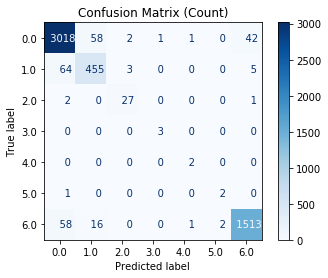

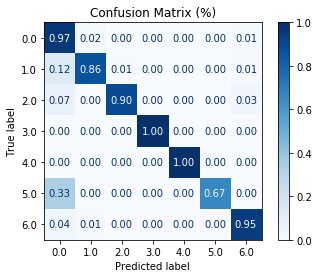

In [15]:
# Confusion matrix
disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize=None,
                            labels="0.0 1.0 2.0 3.0 4.0 5.0 6.0".split(),
                            values_format='6')
disp.ax_.set_title("Confusion Matrix (Count)")
# disp.confusion_matrix

disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize="true",
                            labels="0.0 1.0 2.0 3.0 4.0 5.0 6.0".split(),
                            values_format='.2f')
disp.ax_.set_title("Confusion Matrix (%)")

# k-Fold Validation

In [ ]:
#scores = cross_val_score(clf, X, y, cv=10)

# Random Forest

In [17]:
clf = ensemble.RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Prediction
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {score}")

# 2 dilutions Prediction
score += accuracy_score(y_test_up, y_pred)
score += accuracy_score(y_test_down, y_pred)
print(f"Accuracy (2 dilutions): {score}")

Accuracy: 0.8399621212121212
Accuracy (2 dilutions): 0.9299242424242424


Text(0.5, 1.0, 'Confusion Matrix (%)')

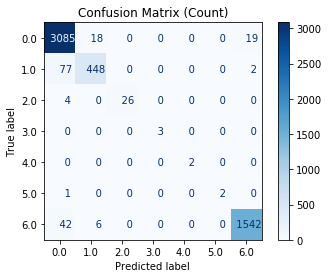

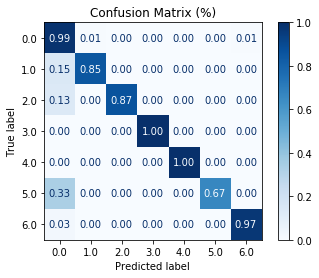

In [18]:
# Confusion matrix
disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize=None,
                            labels="0.0 1.0 2.0 3.0 4.0 5.0 6.0".split(),
                            values_format='6')
disp.ax_.set_title("Confusion Matrix (Count)")
# disp.confusion_matrix

disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize="true",
                            labels="0.0 1.0 2.0 3.0 4.0 5.0 6.0".split(),
                            values_format='.2f')
disp.ax_.set_title("Confusion Matrix (%)")

# AdaBoost

In [19]:
clf = ensemble.AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Prediction
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {score}")

# 2 dilutions Prediction
score += accuracy_score(y_test_up, y_pred)
score += accuracy_score(y_test_down, y_pred)
print(f"Accuracy (2 dilutions): {score}")

Accuracy: 0.6647727272727273
Accuracy (2 dilutions): 0.7443181818181819


Text(0.5, 1.0, 'Confusion Matrix (%)')

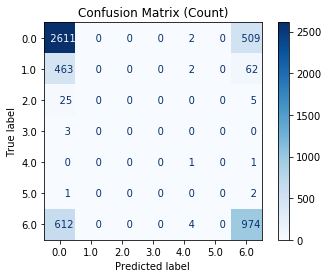

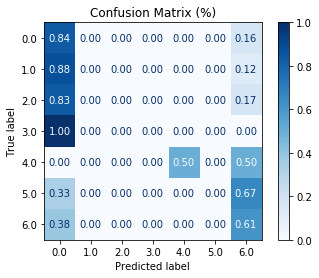

In [20]:
# Confusion matrix
disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize=None,
                            labels="0.0 1.0 2.0 3.0 4.0 5.0 6.0".split(),
                            values_format='6')
disp.ax_.set_title("Confusion Matrix (Count)")
# disp.confusion_matrix

disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize="true",
                            labels="0.0 1.0 2.0 3.0 4.0 5.0 6.0".split(),
                            values_format='.2f')
disp.ax_.set_title("Confusion Matrix (%)")

# Gradient Boosting

In [21]:
clf = ensemble.GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Prediction
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {score}")

# 2 dilutions Prediction
score += accuracy_score(y_test_up, y_pred)
score += accuracy_score(y_test_down, y_pred)
print(f"Accuracy (2 dilutions): {score}")

Accuracy: 0.8380681818181818
Accuracy (2 dilutions): 0.9318181818181818


Text(0.5, 1.0, 'Confusion Matrix (%)')

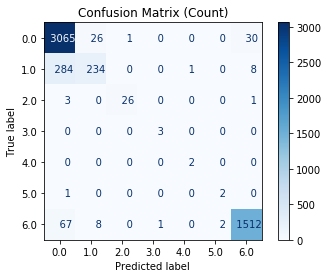

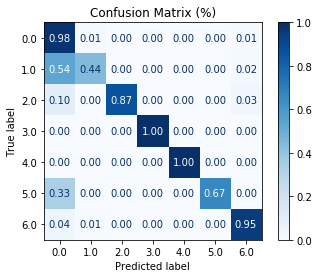

In [22]:
# Confusion matrix
disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize=None,
                            labels="0.0 1.0 2.0 3.0 4.0 5.0 6.0".split(),
                            values_format='6')
disp.ax_.set_title("Confusion Matrix (Count)")
# disp.confusion_matrix

disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize="true",
                            labels="0.0 1.0 2.0 3.0 4.0 5.0 6.0".split(),
                            values_format='.2f')
disp.ax_.set_title("Confusion Matrix (%)")

# Neural Network

In [30]:
clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-7, 
                    hidden_layer_sizes=(5, 5, 5), 
                    random_state=1,
#                     learning_rate="adaptive",
                    max_iter=1000000,
                    tol=1e-8
                   )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Prediction
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {score}")

# 2 dilutions Prediction
score += accuracy_score(y_test_up, y_pred)
score += accuracy_score(y_test_down, y_pred)
print(f"Accuracy (2 dilutions): {score}")

Accuracy: 0.09090909090909091
Accuracy (2 dilutions): 0.6638257575757577


Text(0.5, 1.0, 'Confusion Matrix (%)')

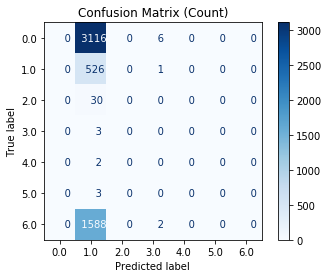

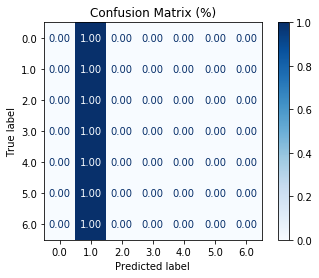

In [31]:
# Confusion matrix
disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize=None,
                            labels="0.0 1.0 2.0 3.0 4.0 5.0 6.0".split(),
                            values_format='6')
disp.ax_.set_title("Confusion Matrix (Count)")
# disp.confusion_matrix

disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize="true",
                            labels="0.0 1.0 2.0 3.0 4.0 5.0 6.0".split(),
                            values_format='.2f')
disp.ax_.set_title("Confusion Matrix (%)")